# Results Notebook

This notebook presents the results of the clustering process performed on the AwA2 dataset using autoencoders and KMeans clustering.

## Table of Contents:
1. Data Loading
2. Model Training
3. Clustering and Embeddings
4. Visualization of Results
    

In [1]:

import json
import matplotlib.pyplot as plt
import numpy as np

# Load the results file
results_file = 'detailed_results_tags2.json'
with open(results_file, 'r') as f:
    results = json.load(f)

print("Results loaded successfully")

# Extract clusters and embeddings from results
clusters = [result['cluster'] for result in results['results']]
embeddings = np.array([result['embedding'] for result in results['results']])
image_paths = [result['image_path'] for result in results['results']]

print("Clusters and embeddings extracted.")


Results loaded successfully
Clusters and embeddings extracted.


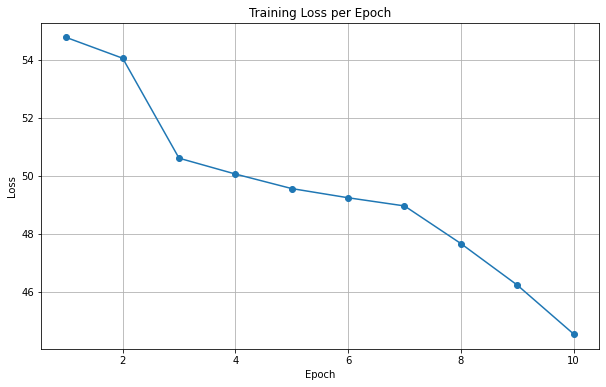

In [2]:

# Plot the training loss over epochs
epochs = results['epochs']
losses = results['training_losses']

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


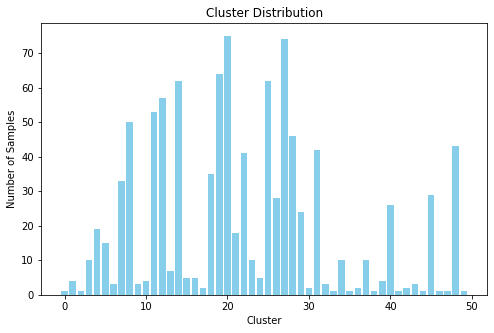

In [3]:

# Visualize the clustering results
# Count how many samples per cluster
unique_clusters, counts = np.unique(clusters, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_clusters, counts, color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()


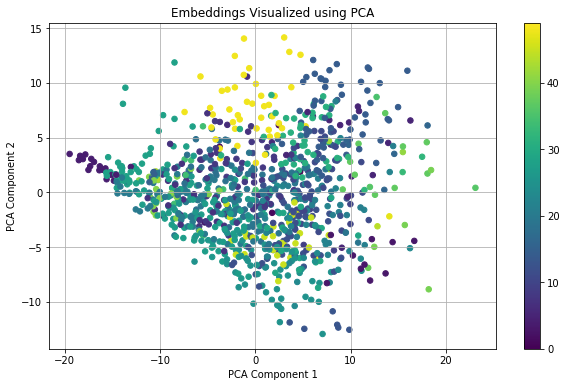

In [4]:

from sklearn.decomposition import PCA

# Reduce dimensionality of embeddings with PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', s=30)
plt.colorbar()
plt.title('Embeddings Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()



## Summary

- We trained an autoencoder on the AwA2 dataset and extracted embeddings.
- The embeddings were clustered using KMeans with the number of clusters set to 50.
- Loss per epoch was tracked, and the cluster distribution and embeddings were visualized.
    